# restart

In [1]:
#!/usr/local/bin/python

import os, sys
import json
import numpy as np
import matplotlib.pyplot as plt
import chainer
from chainer import cuda
from matplotlib import animation
from optparse import OptionParser

from elecpy.util.cmap_bipolar import bipolar
import elecpy.elecpy as elp

from matplotlib import animation, rc
from IPython.display import HTML

import time

%matplotlib inline

## 1st run

In [2]:
# load sample parameter
with open ('elecpy/temp/sim_params_0.json','r') as f:
    sim_params = json.load(f)

# modify parameters
sim_params['time']['end'] = 20
#sim_params["stimulation"]["extracellular"][0]["start"] = 0.
#sim_params["stimulation"]["extracellular"][0]["duration"] = 10.
sim_params['log']['path'] = './result'
sim_params['restart']['source'] = "/mnt/recordings/SimulationResults/2D/20171128-1/"

print json.dumps(sim_params, indent=4)

{
    "cell_type": "mahajan", 
    "log": {
        "path": "./result", 
        "cnt": 1000
    }, 
    "stimulation": {
        "extracellular": [], 
        "membrane": []
    }, 
    "time": {
        "end": 20, 
        "udt": 0.001
    }, 
    "geometory": {
        "width": 200, 
        "ds": 0.015, 
        "height": 200
    }, 
    "restart": {
        "count": 0, 
        "source": "/mnt/recordings/SimulationResults/2D/20171128-1/"
    }
}


In [3]:
g = elp.sim_generator(sim_params)

In [4]:
out = []
while True:
    img = g.next()
    if img is False: break
    out.append(np.copy(img))

elecpy simulation start!
Stimulation settings ...done
Allocating data... ...done
Initializing data... ...done
Building PDE system ... ...done
Main loop start!
------------------0.0ms
------------------1.0ms
------------------2.0ms
------------------3.0ms
------------------4.0ms
------------------5.0ms
------------------6.0ms
------------------7.0ms
------------------8.0ms
------------------9.0ms
------------------10.0ms
------------------11.0ms
------------------12.0ms
------------------13.0ms
------------------14.0ms
------------------15.0ms
------------------16.0ms
------------------17.0ms
------------------18.0ms
------------------19.0ms
------------------20.0ms
elecpy done


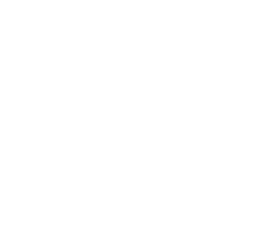

In [5]:
fig = plt.figure()
plt.axis('off')

ims = []
for img in out:
    im = plt.imshow(
        img.reshape(200,200),
        vmin = -100.0, vmax = 20.0,
        cmap=bipolar(neutral=0, lutsize=1024),
        interpolation='nearest')
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims)
#ani.save('anim.gif', writer="imagemagick")
#ani.save('anim.mp4', writer="ffmpeg")
#plt.show()

HTML(ani.to_html5_video())


## 2nd run

In [6]:
del(g)

In [10]:
sim_params['log']['path'] = './result/restart'
sim_params['restart']['source'] = './result'
sim_params['restart']['count'] = 20
print json.dumps(sim_params, indent=4)

{
    "cell_type": "mahajan", 
    "log": {
        "path": "./result/restart", 
        "cnt": 1000
    }, 
    "stimulation": {
        "extracellular": [], 
        "membrane": []
    }, 
    "time": {
        "end": 20, 
        "udt": 0.001
    }, 
    "geometory": {
        "width": 200, 
        "ds": 0.015, 
        "height": 200
    }, 
    "restart": {
        "count": 20, 
        "source": "./result"
    }
}


In [11]:
os.makedirs(sim_params['log']['path'])

In [15]:
g = elp.sim_generator(sim_params)

In [16]:
out = []
while True:
    img = g.next()
    if img is False: break
    out.append(np.copy(img))

elecpy simulation start!
Stimulation settings ...done
Allocating data... ...done
Initializing data... ...done
Building PDE system ... ...done
Main loop start!
------------------0.0ms
------------------1.0ms
------------------2.0ms
------------------3.0ms
------------------4.0ms
------------------5.0ms
------------------6.0ms
------------------7.0ms
------------------8.0ms
------------------9.0ms
------------------10.0ms
------------------11.0ms
------------------12.0ms
------------------13.0ms
------------------14.0ms
------------------15.0ms
------------------16.0ms
------------------17.0ms
------------------18.0ms
------------------19.0ms
------------------20.0ms
elecpy done


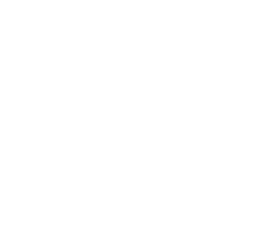

In [17]:
fig = plt.figure()
plt.axis('off')

ims = []
for img in out:
    im = plt.imshow(
        img.reshape(200,200),
        vmin = -100.0, vmax = 20.0,
        cmap=bipolar(neutral=0, lutsize=1024),
        interpolation='nearest')
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims)
#ani.save('anim.gif', writer="imagemagick")
#ani.save('anim.mp4', writer="ffmpeg")
#plt.show()

HTML(ani.to_html5_video())
